In [28]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

In [10]:
#data loader class
class DataLoader:
  def __init__(self,file_name):

    self.file_name = file_name
    
 
  def read_csv(self):

    tweets_df=pd.read_csv(self.file_name)
    return tweets_df
  

In [11]:
#object creation
DataLoader_obj= DataLoader('new_clean_tweet_data.csv')

In [29]:
tweets_df=DataLoader_obj.read_csv()
tweets_df.dropna()

,Unnamed: 0.1,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,5,5,Sun Aug 07 22:31:02 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.200000,0.500000,en,0,36,GraceCh15554845,207,54,False,['Taiwan'],['benedictrogers'],"Melbourne, Victoria"
11,11,11,Sun Aug 07 22:30:35 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Wilson Chinonso Blog: Nigerian tribes, the lis...",0.000000,0.000000,en,1,0,wilson_chnns,28,265,False,"['China', 'ChinaTaiwan', 'ManUnited']",[],Imo State Nigeria
19,19,19,Sun Aug 07 22:30:01 +0000 2022,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",27.89US $ 17% OFF|Usb Condenser Microphone For...,0.000000,0.000000,en,0,0,doos94619918,1936,4792,False,"['aliexpress', 'USA', 'uk', 'RT', 'Europe', 'U...",[],"United States New York,"
36,36,36,Sun Aug 07 22:26:25 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,0.000000,0.000000,en,0,5,nhohn2011,870,508,False,"['PinkFloyd', 'Taiwan', 'China']",['ChinaInfo777'],"Florida, USA"
39,39,39,Sun Aug 07 22:25:37 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","RT @WilliamYang120: ""For too long, #Taiwan has...",-0.025000,0.200000,en,0,84,hoggothoaryhost,44,60,False,['Taiwan'],['WilliamYang120'],Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21981,21981,21981,Sat Aug 06 18:04:09 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200000,0.400000,en,0,99,threadmaxwhispe,657,864,False,"['Taiwan', 'missile']",['jenniferatntd'],Land of Ethan South Dakota
21989,21989,21989,Sat Aug 06 18:03:48 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Minister Wu is crystal clear in his @BBCNews i...,0.158333,0.419444,en,2,0,TECO_Toronto,955,202,False,"['Taiwan', 'StandWithTaiwan', 'DefendDemocracy']","['BBCNews', 'SpeakerPelosi']","Toronto, Canada"
21990,21990,21990,Sat Aug 06 18:03:47 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @SpokespersonCHN: #PLA Live-fire military d...,-0.100000,0.250000,en,0,405,mumaralid,1164,605,True,"['PLA', 'Taiwan']",['SpokespersonCHN'],Driver
21992,21992,21992,Sat Aug 06 18:03:33 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200000,0.400000,en,0,99,9thousandbytes,401,858,False,"['Taiwan', 'missile']",['jenniferatntd'],Northern Virginia


In [30]:
len(tweets_df)

22000

In [31]:
tweets_df.head()

,Unnamed: 0.1,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,NaN,['City'],['i_ameztoy'],NaN
1,1,1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,NaN,"['China', 'Taiwan']",['IndoPac_Info'],NaN
2,2,2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,NaN,['XiJinping'],['ZelenskyyUa'],Netherlands
3,3,3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,NaN,['XiJinping'],[],Netherlands
4,4,4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,NaN,[],['ChinaUncensored'],"Ayent, Schweiz"


In [36]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['original_text']=tweets_df['original_text'].astype(str)
    tweets_df['original_text'] = tweets_df['original_text'].apply(lambda x: x.lower())
    tweets_df['original_text']= tweets_df['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['original_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return word_list, word_to_id, corpus_1

In [39]:
PrepareData_obj=PrepareData(tweets_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [41]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [43]:
print(id_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [47]:
pprint(lda_model.print_topics())

[(0,
  '0.055*"taiwan" + 0.054*"the" + 0.044*"on" + 0.041*"rt" + 0.036*"of" + '
  '0.027*"a" + 0.022*"in" + 0.019*"chinas" + 0.018*"indopacinfo" + '
  '0.016*"military"'),
 (1,
  '0.048*"to" + 0.036*"rt" + 0.034*"taiwan" + 0.033*"the" + 0.020*"and" + '
  '0.018*"a" + 0.017*"of" + 0.017*"china" + 0.014*"in" + 0.013*"is"'),
 (2,
  '0.049*"the" + 0.036*"rt" + 0.033*"is" + 0.024*"china" + 0.020*"this" + '
  '0.018*"taiwan" + 0.015*"by" + 0.014*"of" + 0.013*"video" + 0.012*"ukraine"'),
 (3,
  '0.034*"rt" + 0.030*"in" + 0.025*"island" + 0.018*"they" + 0.018*"taiwan’s" '
  '+ 0.017*"chinese" + 0.015*"near" + 0.015*"amp" + 0.015*"indopacinfo" + '
  '0.015*"3"'),
 (4,
  '0.036*"rt" + 0.034*"taiwan" + 0.025*"china" + 0.024*"part" + 0.022*"hotel" '
  '+ 0.017*"how" + 0.017*"your" + 0.015*"you" + 0.014*"wwiii" + 0.013*"do"')]


In [46]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('taiwan', 0.0549486),
   ('the', 0.05369035),
   ('on', 0.044232953),
   ('rt', 0.040922396),
   ('of', 0.03570916),
   ('a', 0.026698671),
   ('in', 0.021773523),
   ('chinas', 0.019174546),
   ('indopacinfo', 0.017580137),
   ('military', 0.016486056)]),
 (1,
  [('to', 0.047745973),
   ('rt', 0.035964727),
   ('taiwan', 0.03375936),
   ('the', 0.033480596),
   ('and', 0.019775078),
   ('a', 0.017705861),
   ('of', 0.01699895),
   ('china', 0.016700014),
   ('in', 0.013750495),
   ('is', 0.013075245)]),
 (2,
  [('the', 0.04850178),
   ('rt', 0.035560485),
   ('is', 0.033361163),
   ('china', 0.023584995),
   ('this', 0.01975448),
   ('taiwan', 0.01805092),
   ('by', 0.014998743),
   ('of', 0.014038107),
   ('video', 0.0129871),
   ('ukraine', 0.011776147)]),
 (3,
  [('rt', 0.034383453),
   ('in', 0.030449886),
   ('island', 0.02535671),
   ('they', 0.018408647),
   ('taiwan’s', 0.018113319),
   ('chinese', 0.0172565),
   ('near', 0.015035477),
   ('amp', 0.0148996925),
   ('i

In [48]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.607509332930415

 Ldamodel Coherence Score/Accuracy on Tweets:  0.39564009907660064


In [49]:
!pip install pyLDAvis 

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=2a7a8c748bd8385211ed3fff6c8117399ca3572e472f9260fc68b727a205f87a
  Stored in directory: c:\users\acf\appdata\local\pip\cache\wheels\e9\95\74\4766157910829d2fbc6b913850a62cfd15da77a199302cdf9c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=4

You should consider upgrading via the 'C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [50]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.170946  0.062288       1        1  38.559112
0      0.100639  0.077645       2        1  29.439046
2      0.094171  0.080230       3        1  13.478920
3     -0.337264  0.104576       4        1   9.653248
4     -0.028492 -0.324738       5        1   8.869674, topic_info=       Term          Freq         Total Category  logprob  loglift
19      the  16675.000000  16675.000000  Default  30.0000  30.0000
114      on   7538.000000   7538.000000  Default  29.0000  29.0000
37   taiwan  16354.000000  16354.000000  Default  28.0000  28.0000
9        in   7080.000000   7080.000000  Default  27.0000  27.0000
127      is   5809.000000   5809.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
15       rt   1518.430272  17600.095147   Topic5  -3.3181  -0.0277
37   taiwan   1406.743235  16354.137650   Topic5  -3.3945  -0.0307
135    that    456.623866   2625.495360   Topic5  -4.5196   0.6734
127      is    383.889589   5809.486537   Topic5  -4.6931  -0.2944
114      on    289.314494   7538.606331   Topic5  -4.9760  -0.8377

[280 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
781        2  0.996835    23
298        4  0.999105     3
185        2  0.999507   4th
61         1  0.464857     a
61         2  0.535155     a
...      ...       ...   ...
82         5  0.447734   you
584        1  0.215450  your
584        5  0.783658  your
20627      5  0.992484     🎁
2530       5  0.997297     🤗

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])

In [51]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
# Read the Data
DataLoader_obj= DataLoader('new_clean_tweet_data.csv')

In [53]:
tweets_df=DataLoader_obj.read_csv()

In [54]:
tweets_df.head()

,Unnamed: 0.1,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,NaN,['City'],['i_ameztoy'],NaN
1,1,1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,NaN,"['China', 'Taiwan']",['IndoPac_Info'],NaN
2,2,2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,NaN,['XiJinping'],['ZelenskyyUa'],Netherlands
3,3,3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,NaN,['XiJinping'],[],Netherlands
4,4,4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,NaN,[],['ChinaUncensored'],"Ayent, Schweiz"


In [55]:
# plot params
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='place'>

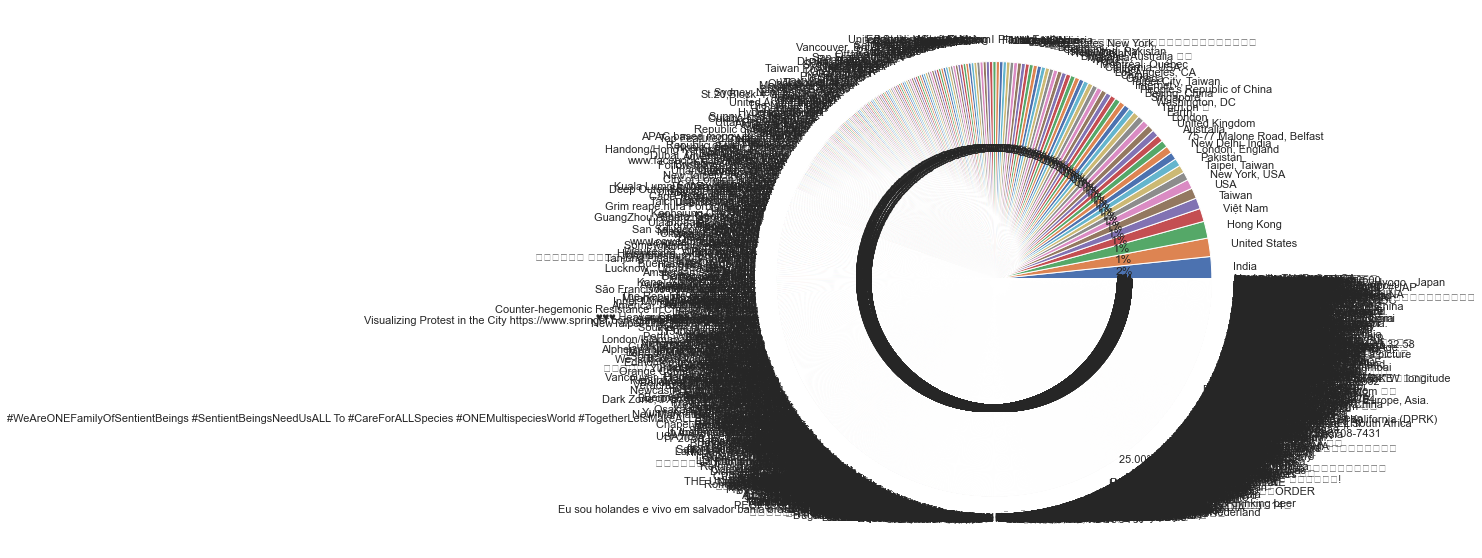

In [57]:
# number of tweets for each airline
sns.set(rc={'figure.figsize':(14,10)})
tweets_df.place.value_counts().plot(kind='pie', autopct='%1.0f%%')

C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='possibly_sensitive'>

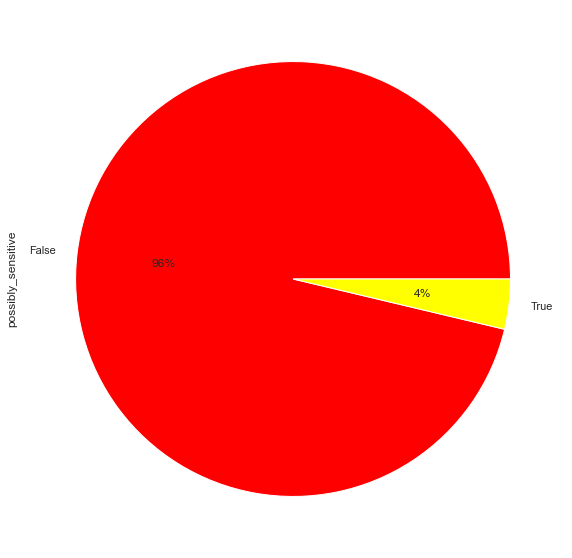

In [58]:
# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
tweets_df.possibly_sensitive.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ACF\PycharmProjects\Twitter-Data-Analysis-main\venv\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='place'>

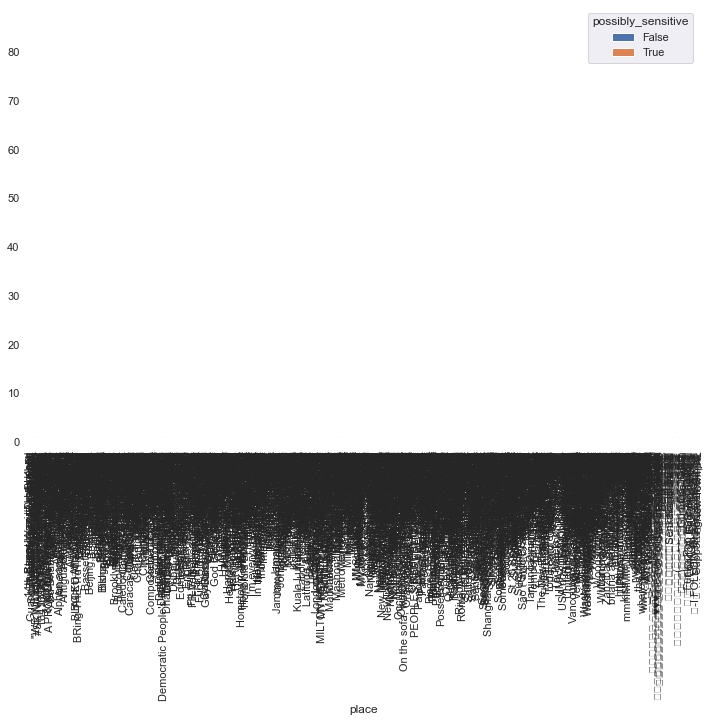

In [64]:
sns.set(rc={'figure.figsize':(12,8)})
possibly_sensitive = tweets_df.groupby(['place', 'possibly_sensitive']).possibly_sensitive.count().unstack()
possibly_sensitive.plot(kind='bar')

In [ ]:
# Selecting the feature and the label
features = airline_tweets_df.iloc[:, 10].values
labels = airline_tweets_df.iloc[:, 1].values

In [ ]:
# Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACF\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [66]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

NameError: name 'processed_features_vectorized' is not defined

In [68]:
predictions = text_classifier.predict(X_test)

NameError: name 'text_classifier' is not defined